In [1]:
import pandas as pd

df = pd.read_csv("../../data/preprocessed_AQI_data.csv")
df.head()

,Country,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,134,2,1,36,0,0,51,2
1,23,0,1,5,0,1,41,0
2,77,2,1,39,0,2,66,2
3,126,0,1,34,0,0,20,0
4,176,2,1,14,0,11,54,2


In [2]:
from sklearn.model_selection import train_test_split

# shuffle the data before splitting
df_shuffled = df.sample(frac=1, random_state=19)
X = df_shuffled.drop(["AQI Category"], axis=1)
y = df_shuffled["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2845, 7) (11384, 7)
(2845,) (11384,)


In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

In [4]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.999033731553057


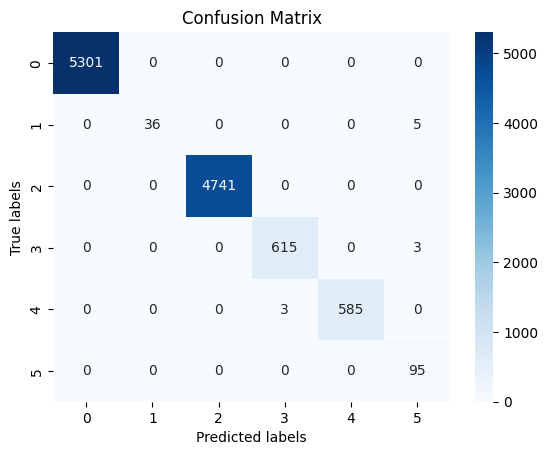

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
)

# here we define different scorers metrics
scorer_f1 = make_scorer(f1_score, average="weighted")
scorer_precision = make_scorer(precision_score, average="weighted", zero_division=1)
scorer_recall = make_scorer(recall_score, average="weighted")
scorer_accuracy = make_scorer(accuracy_score)

# Cwe save them in a dict for easier accessing
scorers = {
    "f1": scorer_f1,
    "precision": scorer_precision,
    "accuracy": scorer_accuracy,
    "recall": scorer_recall,
}
scores_results: dict = {}
for scorer_name, scorer in scorers.items():
    scores = cross_val_score(gb_classifier, X_train, y_train, cv=7, scoring=scorer)
    print(f"{scorer_name.capitalize()} scores:", scores)
    scores_results[scorer_name] = round(scores.mean(), 4)
    print(f"{scorer_name.capitalize()} mean:", round(scores.mean(), 4), "\n")

F1 scores: [0.99649    0.99500425 0.9949143  0.99545576 1.         0.99777152
 0.99731801]
F1 mean: 0.9967 

Precision scores: [0.99815725 0.99520354 0.99510116 0.99630542 1.         0.99876847
 0.99764404]
Precision mean: 0.9973 

Accuracy scores: [0.997543   0.995086   0.995086   0.99507389 1.         0.99753695
 0.99753695]
Accuracy mean: 0.9968 

Recall scores: [0.997543   0.995086   0.995086   0.99507389 1.         0.99753695
 0.99753695]
Recall mean: 0.9968 



In [7]:
import pandas as pd

scores_df = pd.DataFrame.from_dict(scores_results, orient="index", columns=["Scores"])
scores_df

,Scores
f1,0.9967
precision,0.9973
accuracy,0.9968
recall,0.9968
